In [1]:
import pandas as pd
import yfinance as yf

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

start_date = "2021-12-31"
end_date   = "2025-12-31"

In [2]:
stock_selection = ["ATO", "AJBU.SI", "AWK", "AEIS", "JKS", "MLM", "SRE", "FTV",
                  "CCI", "0788.HK", "EQIX", "JCI", "CWEN", "ADI", "FMG.AX",
                  "FCX", "QCOM", "NXPI", "TATASTEEL.NS", "ASML", "NOFR.TA",
                  "TECK", "VAL.JO", "GDS", "LRCX"]

In [3]:
port_data = yf.download(stock_selection, start=start_date, end=end_date, auto_adjust=False)

port_data = port_data['Close']

port_data.index = pd.to_datetime(port_data.index)

port_data.ffill(inplace=True)

[*********************100%***********************]  25 of 25 completed


In [4]:
port_data.head()

Ticker,0788.HK,ADI,AEIS,AJBU.SI,ASML,ATO,AWK,CCI,CWEN,EQIX,FCX,FMG.AX,FTV,GDS,JCI,JKS,LRCX,MLM,NOFR.TA,NXPI,QCOM,SRE,TATASTEEL.NS,TECK,VAL.JO
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-31,8.6,175.770004,91.059998,2.47,796.140015,104.769997,188.860001,208.740005,36.029999,845.840027,41.730000,19.209999,57.490582,47.160000,81.309998,45.959999,71.915001,440.519989,NaN,227.779999,182.869995,66.139999,111.144997,28.820000,181677.0
2022-01-02,8.6,175.770004,91.059998,2.47,796.140015,104.769997,188.860001,208.740005,36.029999,845.840027,41.730000,19.209999,57.490582,47.160000,81.309998,45.959999,71.915001,440.519989,9400.0,227.779999,182.869995,66.139999,111.144997,28.820000,181677.0
2022-01-03,8.5,177.149994,92.820000,2.47,797.489990,105.010002,184.139999,207.740005,35.959999,836.109985,41.480000,19.209999,55.440845,45.380001,79.349998,46.369999,72.545998,439.010010,9640.0,231.220001,186.210007,65.995003,114.245003,29.110001,180356.0
2022-01-04,8.8,175.550003,92.900002,2.45,779.190002,106.260002,179.419998,202.149994,35.389999,814.630005,42.150002,19.850000,55.666920,41.020000,80.339996,46.189999,71.199997,441.510010,9500.0,232.869995,187.229996,67.184998,114.879997,29.200001,185807.0
2022-01-05,8.9,172.839996,89.419998,2.43,745.669983,106.599998,178.100006,188.460007,33.970001,789.099976,41.680000,19.959999,54.491333,39.070000,79.029999,43.560001,69.181000,437.170013,9607.0,224.570007,186.500000,67.595001,117.760002,29.420000,186215.0


---
**Currency Conversion**

- AJBU.SI = Singapore Dollar
- FMG.AX = Australian Dollar
- NOFR.TA = Israeli Agora (1/100th of Israeli New Shekel)
- TATASTEEL.NS = Indian Rupee
- VAL.JO = South African Cents (1/100th of South African Rand)
- 0788.HK = Hong Kong Dollar

---

In [5]:
#Singapore Dollar
sgd = "SGDUSD=X"

sgd_data = yf.download(sgd, start=start_date, end=end_date, auto_adjust=False)

sgd_data = sgd_data['Close']

sgd_usd_data = pd.concat([port_data['AJBU.SI'], sgd_data], axis=1)

sgd_usd_data.ffill(inplace=True)

sgd_usd_data.head(10)

sgd_usd_data['AJBU.USD'] = sgd_usd_data['AJBU.SI']*sgd_usd_data['SGDUSD=X']

print(sgd_usd_data['AJBU.USD'])

[*********************100%***********************]  1 of 1 completed

Date
2021-12-31    1.827045
2022-01-02    1.827045
2022-01-03    1.832072
2022-01-04    1.810630
2022-01-05    1.792419
2022-01-06    1.760317
2022-01-07    1.734096
2022-01-09    1.734096
2022-01-10    1.710599
2022-01-11    1.696428
2022-01-12    1.702896
2022-01-13    1.723754
2022-01-14    1.701274
2022-01-16    1.701274
2022-01-17    1.698108
2022-01-18    1.690868
2022-01-19    1.688239
2022-01-20    1.684726
2022-01-21    1.677940
2022-01-23    1.677940
2022-01-24    1.673485
2022-01-25    1.627841
2022-01-26    1.652032
2022-01-27    1.609554
2022-01-28    1.596877
2022-01-30    1.596877
2022-01-31    1.578299
2022-02-01    1.583356
2022-02-02    1.586878
2022-02-03    1.595547
2022-02-04    1.614547
2022-02-06    1.614547
2022-02-07    1.590889
2022-02-08    1.629974
2022-02-09    1.643612
2022-02-10    1.654741
2022-02-11    1.635128
2022-02-13    1.635128
2022-02-14    1.603587
2022-02-15    1.626439
2022-02-16    1.613719
2022-02-17    1.615774
2022-02-18    1.608579
2022-0

In [6]:
#Australian Dollar
aud = "AUDUSD=X"

aud_data = yf.download(aud, start=start_date, end=end_date, auto_adjust=False)

aud_data = aud_data['Close']

aud_usd_data = pd.concat([port_data['FMG.AX'], aud_data], axis=1)

aud_usd_data.ffill(inplace=True)

aud_usd_data.head(10)

aud_usd_data['FMG.USD'] = aud_usd_data['FMG.AX']*aud_usd_data['AUDUSD=X']

print(aud_usd_data['FMG.USD'])

[*********************100%***********************]  1 of 1 completed

Date
2021-12-31    13.926869
2022-01-02    13.926869
2022-01-03    13.962176
2022-01-04    14.288029
2022-01-05    14.448649
2022-01-06    14.261081
2022-01-07    14.590217
2022-01-09    14.590217
2022-01-10    14.817685
2022-01-11    15.166269
2022-01-12    15.054062
2022-01-13    15.583924
2022-01-14    15.562190
2022-01-16    15.562190
2022-01-17    14.988707
2022-01-18    14.962406
2022-01-19    14.691254
2022-01-20    15.437165
2022-01-21    15.112587
2022-01-23    15.112587
2022-01-24    14.749539
2022-01-25    13.951272
2022-01-26    13.959661
2022-01-27    13.875603
2022-01-28    13.684049
2022-01-30    13.684049
2022-01-31    13.905023
2022-02-01    13.945758
2022-02-02    14.596145
2022-02-03    15.046245
2022-02-04    15.247432
2022-02-06    15.247432
2022-02-07    15.243882
2022-02-08    15.849986
2022-02-09    15.313706
2022-02-10    15.991273
2022-02-11    16.350156
2022-02-13    16.350156
2022-02-14    16.254411
2022-02-15    15.398200
2022-02-16    15.120319
2022-02-17 

In [7]:
#Israeli Agora
ila = "ILSUSD=X"

ila_data = yf.download(ila, start=start_date, end=end_date, auto_adjust=False)

ila_data = ila_data['Close']

ila_usd_data = pd.concat([port_data['NOFR.TA'], ila_data], axis=1)

ila_usd_data.ffill(inplace=True)

ila_usd_data.head(10)

ila_usd_data['NOFR.USD'] = (ila_usd_data['NOFR.TA'] / 100)*ila_usd_data['ILSUSD=X']     #/100 converts Israeli Agora to New Shekel

print(ila_usd_data['NOFR.USD'])

[*********************100%***********************]  1 of 1 completed

Date
2021-12-31          NaN
2022-01-02    30.281458
2022-01-03    31.006856
2022-01-04    30.549669
2022-01-05    31.147870
2022-01-06    29.567904
2022-01-07    29.388622
2022-01-09    29.147758
2022-01-10    28.265646
2022-01-11    28.309283
2022-01-12    28.718850
2022-01-13    28.418988
2022-01-14    28.375133
2022-01-16    28.047208
2022-01-17    28.154773
2022-01-18    27.466271
2022-01-19    26.228965
2022-01-20    26.303540
2022-01-21    26.406844
2022-01-23    26.525275
2022-01-24    25.202644
2022-01-25    25.261601
2022-01-26    26.406540
2022-01-27    26.956572
2022-01-28    26.805337
2022-01-30    26.639408
2022-01-31    26.159285
2022-02-01    26.524222
2022-02-02    27.454235
2022-02-03    28.038296
2022-02-04    27.880773
2022-02-06    27.425922
2022-02-07    25.939449
2022-02-08    25.901214
2022-02-09    26.373115
2022-02-10    26.653193
2022-02-11    26.565783
2022-02-13    25.645648
2022-02-14    25.352461
2022-02-15    25.580233
2022-02-16    27.140121
2022-02-17 

In [8]:
#Indian Rupee
inr = "INRUSD=X"

inr_data = yf.download(inr, start=start_date, end=end_date, auto_adjust=False)

inr_data = inr_data['Close']

inr_usd_data = pd.concat([port_data['TATASTEEL.NS'], inr_data], axis=1)

inr_usd_data.ffill(inplace=True)

inr_usd_data.head(10)

inr_usd_data['TATASTEEL.USD'] = inr_usd_data['TATASTEEL.NS']*inr_usd_data['INRUSD=X']

print(inr_usd_data['TATASTEEL.USD'])

[*********************100%***********************]  1 of 1 completed

Date
2021-12-31    1.493258
2022-01-02    1.493258
2022-01-03    1.533206
2022-01-04    1.544018
2022-01-05    1.579931
2022-01-06    1.562876
2022-01-07    1.559206
2022-01-09    1.559206
2022-01-10    1.574054
2022-01-11    1.526189
2022-01-12    1.554149
2022-01-13    1.654695
2022-01-14    1.640614
2022-01-16    1.640614
2022-01-17    1.653356
2022-01-18    1.609115
2022-01-19    1.621020
2022-01-20    1.620837
2022-01-21    1.571075
2022-01-23    1.571075
2022-01-24    1.477157
2022-01-25    1.485837
2022-01-26    1.483151
2022-01-27    1.453168
2022-01-28    1.442175
2022-01-30    1.442175
2022-01-31    1.446648
2022-02-01    1.565740
2022-02-02    1.561967
2022-02-03    1.559159
2022-02-04    1.575882
2022-02-06    1.575882
2022-02-07    1.584894
2022-02-08    1.633576
2022-02-09    1.636451
2022-02-10    1.668719
2022-02-11    1.660679
2022-02-13    1.660679
2022-02-14    1.575304
2022-02-15    1.595750
2022-02-16    1.585372
2022-02-17    1.587045
2022-02-18    1.586401
2022-0

In [9]:
#South African Cents
zac = "ZARUSD=X"

zac_data = yf.download(zac, start=start_date, end=end_date, auto_adjust=False)

zac_data = zac_data['Close']

zac_usd_data = pd.concat([port_data['VAL.JO'], zac_data], axis=1)

zac_usd_data.ffill(inplace=True)

zac_usd_data.head(10)

zac_usd_data['VAL.USD'] = (zac_usd_data['VAL.JO'] / 100) *zac_usd_data['ZARUSD=X']       #/100 converts South African Cents to South African Rand (ZAR)

print(zac_usd_data['VAL.USD'])

[*********************100%***********************]  1 of 1 completed

Date
2021-12-31    114.340644
2022-01-02    114.340644
2022-01-03    113.218534
2022-01-04    117.143398
2022-01-05    116.390785
2022-01-06    116.471713
2022-01-07    116.867865
2022-01-09    116.867865
2022-01-10    115.716326
2022-01-11    116.148228
2022-01-12    121.581333
2022-01-13    121.906437
2022-01-14    116.430436
2022-01-16    116.430436
2022-01-17    115.736595
2022-01-18    112.479127
2022-01-19    116.585417
2022-01-20    120.582658
2022-01-21    117.641640
2022-01-23    117.641640
2022-01-24    114.905267
2022-01-25    118.294154
2022-01-26    125.676777
2022-01-27    122.722452
2022-01-28    115.396882
2022-01-30    115.396882
2022-01-31    119.062241
2022-02-01    120.088490
2022-02-02    119.633083
2022-02-03    117.954919
2022-02-04    119.584017
2022-02-06    119.584017
2022-02-07    120.334983
2022-02-08    119.922000
2022-02-09    124.182588
2022-02-10    121.714373
2022-02-11    128.575386
2022-02-13    128.575386
2022-02-14    127.098465
2022-02-15    124.64

In [10]:
#Hong Kong Dollar
hkd = "HKDUSD=X"

hkd_data = yf.download(hkd, start=start_date, end=end_date, auto_adjust=False)

hkd_data = hkd_data['Close']

hkd_usd_data = pd.concat([port_data['0788.HK'], hkd_data], axis=1)

hkd_usd_data.ffill(inplace=True)

hkd_usd_data.head(10)

hkd_usd_data['0788.USD'] = hkd_usd_data['0788.HK']*hkd_usd_data['HKDUSD=X']

print(hkd_usd_data['0788.USD'])

[*********************100%***********************]  1 of 1 completed

Date
2021-12-31    1.102909
2022-01-02    1.102909
2022-01-03    1.090314
2022-01-04    1.128538
2022-01-05    1.141977
2022-01-06    1.154557
2022-01-07    1.179393
2022-01-09    1.179393
2022-01-10    1.179764
2022-01-11    1.141684
2022-01-12    1.167265
2022-01-13    1.167896
2022-01-14    1.168481
2022-01-16    1.168481
2022-01-17    1.156191
2022-01-18    1.181016
2022-01-19    1.193463
2022-01-20    1.219306
2022-01-21    1.207292
2022-01-23    1.207292
2022-01-24    1.219973
2022-01-25    1.194422
2022-01-26    1.220237
2022-01-27    1.194376
2022-01-28    1.193930
2022-01-30    1.193930
2022-01-31    1.193294
2022-02-01    1.192722
2022-02-02    1.193204
2022-02-03    1.192996
2022-02-04    1.231867
2022-02-06    1.231867
2022-02-07    1.232682
2022-02-08    1.244868
2022-02-09    1.244659
2022-02-10    1.257841
2022-02-11    1.269789
2022-02-13    1.269789
2022-02-14    1.243457
2022-02-15    1.243175
2022-02-16    1.256207
2022-02-17    1.256491
2022-02-18    1.243733
2022-0

**Stock Collection in USD**

In [11]:
adjusted_stocks = [port_data, sgd_usd_data['AJBU.USD'], aud_usd_data['FMG.USD'],
         ila_usd_data['NOFR.USD'], inr_usd_data['TATASTEEL.USD'],
         zac_usd_data['VAL.USD'], hkd_usd_data['0788.USD']]

usd_port = pd.concat(adjusted_stocks, axis=1)

usd_port.head()

usd_port.drop(columns=['AJBU.SI', '0788.HK', 'FMG.AX', 'NOFR.TA', 'TATASTEEL.NS', 'VAL.JO'], inplace=True)

usd_port.head()

,ADI,AEIS,ASML,ATO,AWK,CCI,CWEN,EQIX,FCX,FTV,GDS,JCI,JKS,LRCX,MLM,NXPI,QCOM,SRE,TECK,AJBU.USD,FMG.USD,NOFR.USD,TATASTEEL.USD,VAL.USD,0788.USD
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-31,175.770004,91.059998,796.140015,104.769997,188.860001,208.740005,36.029999,845.840027,41.730000,57.490582,47.160000,81.309998,45.959999,71.915001,440.519989,227.779999,182.869995,66.139999,28.820000,1.827045,13.926869,NaN,1.493258,114.340644,1.102909
2022-01-02,175.770004,91.059998,796.140015,104.769997,188.860001,208.740005,36.029999,845.840027,41.730000,57.490582,47.160000,81.309998,45.959999,71.915001,440.519989,227.779999,182.869995,66.139999,28.820000,1.827045,13.926869,30.281458,1.493258,114.340644,1.102909
2022-01-03,177.149994,92.820000,797.489990,105.010002,184.139999,207.740005,35.959999,836.109985,41.480000,55.440845,45.380001,79.349998,46.369999,72.545998,439.010010,231.220001,186.210007,65.995003,29.110001,1.832072,13.962176,31.006856,1.533206,113.218534,1.090314
2022-01-04,175.550003,92.900002,779.190002,106.260002,179.419998,202.149994,35.389999,814.630005,42.150002,55.666920,41.020000,80.339996,46.189999,71.199997,441.510010,232.869995,187.229996,67.184998,29.200001,1.810630,14.288029,30.549669,1.544018,117.143398,1.128538
2022-01-05,172.839996,89.419998,745.669983,106.599998,178.100006,188.460007,33.970001,789.099976,41.680000,54.491333,39.070000,79.029999,43.560001,69.181000,437.170013,224.570007,186.500000,67.595001,29.420000,1.792419,14.448649,31.147870,1.579931,116.390785,1.141977


---
**Portfolio Creation**
---
*Code inspired from DataCamp - Portfolio Analysis Intro*

---

In [12]:
import numpy as np

port_return = usd_port.pct_change()

avg_return = port_return.mean()

weights = [1 / 25] * 25

exp_return = np.sum(avg_return*weights)

print(str(np.round(exp_return, 4) * 100) + '%')      #Expected Daily Portfolio Return

0.04%


/tmp/ipython-input-1168125428.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  port_return = usd_port.pct_change()


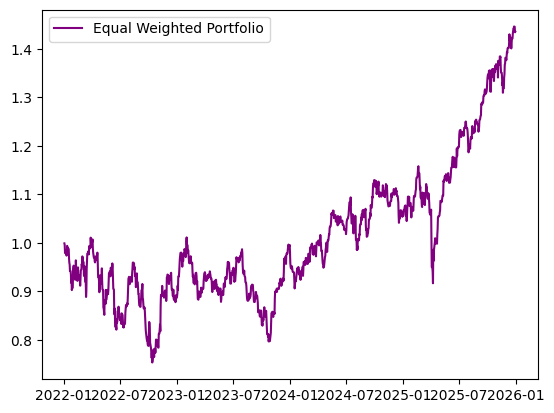

In [13]:
import matplotlib.pyplot as plt

port_ret = port_return.dot(weights)     #Daily Portfolio Return

daily_cum_ret=(1+port_ret).cumprod()    #Compounds returns beginning from investing £1 in the portfolio

fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret, color='purple', label="Equal Weighted Portfolio")
plt.legend()
plt.show()

In [14]:
cov_matrix = (port_return.cov())*252        # Calculate the covariance matrix (positive = 2 assets move up or down together)
                                            #(negative = one rise while the other falls, zero = no relation)
weights = np.array(weights)           #weights changed to array so it can be transposed (.T)

port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))    #.T (transpose) allows matrix multiplication as weights.T is a row vector now

print(str(np.round(port_variance, 4) * 100) + '%')

port_standard_dev = np.sqrt(port_variance)

print(str(np.round(port_standard_dev, 4) * 100) + '%')

3.2199999999999998%
17.94%


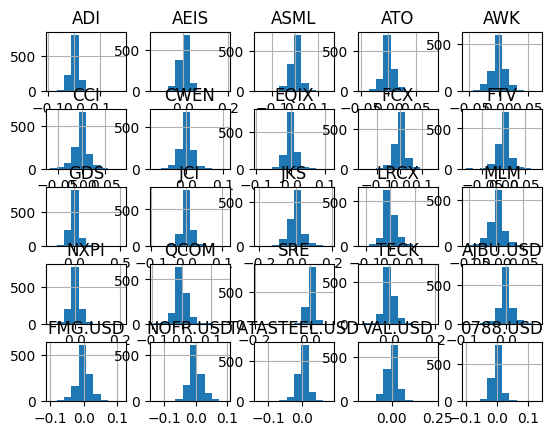

mean :  ADI              0.054351
AEIS             0.096418
ASML             0.053165
ATO              0.044095
AWK             -0.020657
CCI             -0.057301
CWEN             0.009079
EQIX             0.005257
FCX              0.047983
FTV              0.008019
GDS              0.103839
JCI              0.045480
JKS              0.028098
LRCX             0.105290
MLM              0.040257
NXPI             0.023197
QCOM             0.020361
SRE              0.033224
TECK             0.073632
AJBU.USD         0.006294
FMG.USD          0.030607
NOFR.USD         0.030539
TATASTEEL.USD    0.037214
VAL.USD          0.034019
0788.USD         0.037461
dtype: float64
Std. dev  :  ADI              1.918265
AEIS             2.359023
ASML             2.411962
ATO              1.065772
AWK              1.328211
CCI              1.513726
CWEN             1.748608
EQIX             1.606558
FCX              2.491950
FTV              1.427237
GDS              5.133138
JCI              1.637943
JK

In [15]:
port_return.hist()
plt.show()

print("mean : ", port_return.mean()*100)
print("Std. dev  : ", port_return.std()*100)
print("skew : ", port_return.skew())
print("kurt : ", port_return.kurtosis())

In [16]:
!pip install PyPortfolioOpt
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 6.6 MB/s eta 0:00:00


In [17]:
mu = expected_returns.mean_historical_return(usd_port)

sigma = risk_models.sample_cov(usd_port)

ef = EfficientFrontier(mu, sigma)
print(mu,sigma)

ADI              0.095729
AEIS             0.190306
ASML             0.062772
ATO              0.102181
AWK             -0.071905
CCI             -0.159817
CWEN            -0.015444
EQIX            -0.019107
FCX              0.043594
FTV             -0.005577
GDS             -0.061382
JCI              0.084598
JKS             -0.107762
LRCX             0.197782
MLM              0.076419
NXPI            -0.007102
QCOM            -0.010526
SRE              0.062823
TECK             0.109841
AJBU.USD        -0.010404
FMG.USD          0.011947
NOFR.USD         0.015831
TATASTEEL.USD    0.056431
VAL.USD         -0.054177
0788.USD         0.063487
dtype: float64                     ADI      AEIS      ASML       ATO       AWK       CCI  \
ADI            0.093181  0.080770  0.079547  0.010340  0.010520  0.014817   
AEIS           0.080770  0.140920  0.096683  0.009003  0.008800  0.015810   
ASML           0.079547  0.096683  0.147317  0.007844  0.007931  0.013845   
ATO            0.010340  0.

/usr/local/lib/python3.12/dist-packages/pypfopt/expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(


In [18]:
raw_weights_maxsharpe = ef.max_sharpe()           #Sharpe ratio = (Expected Return - Risk Free Return (usually 0 or close)) / Portfolio Volatility
cleaned_weights_maxsharpe = ef.clean_weights()    #Measures portfolio return per unit of volatility
print(raw_weights_maxsharpe, cleaned_weights_maxsharpe)

OrderedDict({'ADI': 0.0, 'AEIS': 0.1225865611188276, 'ASML': 0.0, 'ATO': 0.5835872006278714, 'AWK': 0.0, 'CCI': 0.0, 'CWEN': 0.0, 'EQIX': 0.0, 'FCX': 0.0, 'FTV': 0.0, 'GDS': 0.0, 'JCI': 0.0, 'JKS': 0.0, 'LRCX': 0.0880556107078906, 'MLM': 0.0, 'NXPI': 0.0, 'QCOM': 0.0, 'SRE': 0.0, 'TECK': 0.0, 'AJBU.USD': 0.0, 'FMG.USD': 0.0, 'NOFR.USD': 0.0, 'TATASTEEL.USD': 0.0556760717702328, 'VAL.USD': 0.0, '0788.USD': 0.150094555775178}) OrderedDict({'ADI': 0.0, 'AEIS': 0.12259, 'ASML': 0.0, 'ATO': 0.58359, 'AWK': 0.0, 'CCI': 0.0, 'CWEN': 0.0, 'EQIX': 0.0, 'FCX': 0.0, 'FTV': 0.0, 'GDS': 0.0, 'JCI': 0.0, 'JKS': 0.0, 'LRCX': 0.08806, 'MLM': 0.0, 'NXPI': 0.0, 'QCOM': 0.0, 'SRE': 0.0, 'TECK': 0.0, 'AJBU.USD': 0.0, 'FMG.USD': 0.0, 'NOFR.USD': 0.0, 'TATASTEEL.USD': 0.05568, 'VAL.USD': 0.0, '0788.USD': 0.15009})


In [19]:
print(cleaned_weights_maxsharpe)
ef.portfolio_performance(verbose=True)
#0.79 Sharpe is Suboptimal
#14.3% volatility is less than S&P500 estimated 19-22% in 2025

OrderedDict({'ADI': 0.0, 'AEIS': 0.12259, 'ASML': 0.0, 'ATO': 0.58359, 'AWK': 0.0, 'CCI': 0.0, 'CWEN': 0.0, 'EQIX': 0.0, 'FCX': 0.0, 'FTV': 0.0, 'GDS': 0.0, 'JCI': 0.0, 'JKS': 0.0, 'LRCX': 0.08806, 'MLM': 0.0, 'NXPI': 0.0, 'QCOM': 0.0, 'SRE': 0.0, 'TECK': 0.0, 'AJBU.USD': 0.0, 'FMG.USD': 0.0, 'NOFR.USD': 0.0, 'TATASTEEL.USD': 0.05568, 'VAL.USD': 0.0, '0788.USD': 0.15009})
Expected annual return: 11.3%
Annual volatility: 14.3%
Sharpe Ratio: 0.79


(np.float64(0.11304708477292848),
 np.float64(0.14307906149791869),
 np.float64(0.7901022245283104))

In [20]:
ef_min = EfficientFrontier(mu, sigma)
raw_weights_minvol = ef_min.min_volatility()        #Finding the weights of the minimum volatility portfolio
cleaned_weights_minvol = ef_min.clean_weights()

In [21]:
print(cleaned_weights_minvol)
ef_min.portfolio_performance(verbose=True)
#Lower volatility but far worse returns and Sharpe ratio

OrderedDict({'ADI': 0.0, 'AEIS': 0.0, 'ASML': 0.0, 'ATO': 0.30473, 'AWK': 0.05726, 'CCI': 0.01115, 'CWEN': 0.0, 'EQIX': 0.0, 'FCX': 0.0, 'FTV': 0.08604, 'GDS': 0.0, 'JCI': 0.03108, 'JKS': 0.0, 'LRCX': 0.0, 'MLM': 0.03608, 'NXPI': 0.0, 'QCOM': 0.0095, 'SRE': 0.0, 'TECK': 0.0, 'AJBU.USD': 0.16318, 'FMG.USD': 0.02008, 'NOFR.USD': 0.05876, 'TATASTEEL.USD': 0.07505, 'VAL.USD': 0.0025, '0788.USD': 0.14459})
Expected annual return: 4.3%
Annual volatility: 11.2%
Sharpe Ratio: 0.38


(np.float64(0.04279626641189143),
 np.float64(0.11227247682168384),
 np.float64(0.38118217058542647))

In [22]:
sp500 = yf.download(tickers='^GSPC', start=start_date, end=end_date)

sp500_returns = sp500.pct_change().dropna()

sp500_ret = sp500_returns.mean() * 252
sp500_vol = sp500_returns.std() * np.sqrt(252)

/tmp/ipython-input-3638338552.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download(tickers='^GSPC', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


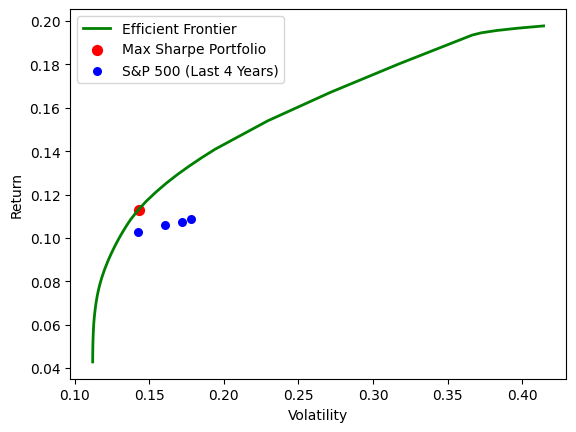

In [23]:
from pypfopt import CLA

efficient_portfolio = CLA(mu, cov_matrix)

(ret, vol, weights) = efficient_portfolio.efficient_frontier()

efficient_portfolio.max_sharpe()
ret_s, vol_s, _ = efficient_portfolio.portfolio_performance()

plt.plot(vol, ret, c = 'g', linewidth=2, label = "Efficient Frontier")
plt.scatter(vol_s, ret_s, marker='.', s=200, c='r', label='Max Sharpe Portfolio')
plt.scatter(sp500_vol, sp500_ret, c='b', s=120, marker='.', label='S&P 500 (Last 4 Years)')

plt.xlabel("Volatility")
plt.ylabel("Return")
plt.legend()
plt.show()

---
**Kelly Criterion Calculation**
---

*Finds optimal portfolio allocation for long-term growth*

---

In [24]:
kelly_returns = np.log(usd_port / usd_port.shift(1)).dropna()     #Log (continuous compounded returns) of todays value / yesterdays value (=growth_ratio)
                                                                  #Growth ratio > 1 (portfolio grew in value), < 1 (shrunk)
kelly_mu = kelly_returns.mean() *252
kelly_sigma = kelly_returns.cov() *252

kelly_mu = mu.values
kelly_sigma = kelly_sigma.values        #Changes to numpy array for numpy library use

In [25]:
kelly_weights = np.linalg.inv(kelly_sigma) @ kelly_mu       #Raw Kelly Portfolio weights, @=matrix multiplication
                                                            #Cov matrix kelly_sigma finds stocks moving together, inverse eliminates this rewarding diversification
kelly_weights = kelly_weights / np.sum(np.abs(kelly_weights))    #Scaled so weights add up to 1
                                                                #Weights can appear as negative to indicate shorting the stock, so removed with np.abs()
kelly_weights = kelly_weights * 0.5     #Fractional Kelly (1/2) is used in industry to reduce drawdowns, or large losses

In [26]:
kport_ret = kelly_weights @ kelly_mu
kport_vol = np.sqrt(kelly_weights @ kelly_sigma @ kelly_weights)

In [29]:
growth_rate = kport_ret - 0.5 * kport_vol**2       #Variable Kelly Criterion is built to maximise
print(str(np.round(growth_rate, 4) * 100) + '%')    #4% Log Compound Growth Rate, considered solid

#Interpretation: The typical outcome would provide investor with 4% growth per year, after accounting for volatility
#After 1 year: $100 -> $104, After 18 years: $100 -> approx. $200

4.25%
